In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

## Data Preprocessing

In [3]:
train_df = pd.read_csv('data/train.csv')
test1_df = pd.read_csv('data/test1.csv')
print(train_df.head())

   id  v1  v2  v3  v4  v5  v6  v7  v8  v9  ...  v776  v777  v778  v779  v780  \
0   1   0   0   0   0   0   0   0   0   4  ...     0     0     0     0     0   
1   2   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
2   3   0   0   0   0   0   0   0   1   1  ...     7     1     0     0     0   
3   4   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
4   5   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   

   v781  v782  v783  v784  label  
0     0     0     0     0      6  
1     0     0     0     0      7  
2     0     0     0     0      4  
3     0     0     0     0      7  
4     0     0     0     0      3  

[5 rows x 786 columns]


In [4]:
#separate features and labels
X_train = train_df.iloc[:, 1:-1].values  # feature columns
y_train = train_df.iloc[:, -1].values  # label column

X_test1 = test1_df.iloc[:, 1:-1].values  # feature
y_test1 = test1_df.iloc[:, -1].values  # label

In [5]:
#normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test1_scaled = scaler.transform(X_test1)

In [6]:
# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test1_pca = pca.transform(X_test1_scaled)

## KNN

In [6]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5],    # Number of neighbors
    'weights': ['uniform', 'distance'],    # Weight function
    'metric': ['manhattan']    # Distance metric
}

# Perform 5-fold cross-validation with GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Train the KNN model with PCA data
grid_search_knn.fit(X_train_pca, y_train)

# Output the best parameters
print("Best parameters for KNN:", grid_search_knn.best_params_)

# Use the best model to make predictions with PCA data
y_pred_knn = grid_search_knn.predict(X_test1_pca)

# Output classification report
print(classification_report(y_test1, y_pred_knn))


Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       191
           1       0.98      0.96      0.97       199
           2       0.79      0.78      0.79       191
           3       0.87      0.88      0.87       174
           4       0.81      0.83      0.82       203
           5       0.99      0.80      0.89       210
           6       0.68      0.66      0.67       201
           7       0.85      0.95      0.90       212
           8       0.99      0.95      0.97       216
           9       0.88      0.95      0.91       203

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.86      2000
weighted avg       0.87      0.87      0.87      2000



## Naive Bayes

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Standardize the data
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test1_standard = scaler_standard.transform(X_test1)

# Define the Naive Bayes model
nb = GaussianNB()

# Since Naive Bayes doesn't have many hyperparameters, we define an empty param_grid
param_grid_nb = {}

# Use GridSearchCV to perform 5-fold cross-validation
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=10, scoring='accuracy')

# Train the model
grid_search_nb.fit(X_train_pca, y_train)

# Access the cross-validation results
cv_results_nb = grid_search_nb.cv_results_

# Output the best parameters (for Naive Bayes, this will just return the base model)
print("Best parameters for Naive Bayes:", grid_search_nb.best_params_)

# Use the best model to make predictions
y_pred_nb = grid_search_nb.best_estimator_.predict(X_test1_pca)

# Output classification report
print("Naive Bayes with fine-tuning - accuracy on test set:")
print(classification_report(y_test1, y_pred_nb))


Best parameters for Naive Bayes: {}
Naive Bayes with fine-tuning - accuracy on test set:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       191
           1       0.93      0.91      0.92       199
           2       0.74      0.69      0.71       191
           3       0.77      0.73      0.75       174
           4       0.79      0.72      0.76       203
           5       0.83      0.77      0.80       210
           6       0.61      0.53      0.57       201
           7       0.75      0.87      0.81       212
           8       0.65      0.86      0.74       216
           9       0.92      0.85      0.88       203

    accuracy                           0.77      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000



## SVM

In [20]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Set up a pipeline with PCA and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Ensuring the data is scaled
    ('pca', PCA()),                # PCA for dimensionality reduction
    ('svm', SVC(kernel='rbf', random_state=42))  # RBF kernel for SVM
])

# Define the grid of hyperparameters
param_grid = {
    'pca__n_components': [100,150],  # Reduced dimensionality options
    'svm__C': [2, 5],               # Regularization parameter
    'svm__gamma': ['scale']           # Gamma parameter for RBF kernel
}

# Use GridSearchCV for hyperparameter tuning
gridsearch_SVM = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the model on the scaled training data
gridsearch_SVM.fit(X_train_scaled, y_train)

# Output the best hyperparameters found by GridSearchCV
print("Best parameters for SVM:", gridsearch_SVM.best_params_)

# Predict on the test data
y_pred_svm = gridsearch_SVM.best_estimator_.predict(X_test1_scaled)

# Evaluate the model
print("SVM with PCA and GridSearchCV - accuracy on test set:")
print(accuracy_score(y_test1, y_pred_svm))
print(classification_report(y_test1, y_pred_svm))

Best parameters for SVM: {'pca__n_components': 150, 'svm__C': 5, 'svm__gamma': 'scale'}
SVM with PCA and GridSearchCV - accuracy on test set:
0.9065
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       191
           1       0.98      0.98      0.98       199
           2       0.84      0.85      0.84       191
           3       0.88      0.92      0.90       174
           4       0.87      0.89      0.88       203
           5       0.99      0.94      0.97       210
           6       0.80      0.67      0.73       201
           7       0.93      0.97      0.95       212
           8       0.96      0.98      0.97       216
           9       0.94      0.96      0.95       203

    accuracy                           0.91      2000
   macro avg       0.90      0.91      0.90      2000
weighted avg       0.91      0.91      0.91      2000



## Bagging with SVM

In [30]:
import time
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Define the base SVM model
base_svm = SVC(kernel='rbf', random_state=42)

# Set up the BaggingClassifier with the base SVM
bagging_svm = BaggingClassifier(
    base_estimator=base_svm,
    n_estimators=10,  # Number of base SVM models in the ensemble
    max_samples=0.8,  # Each SVM is trained on 80% of the training data
    n_jobs=-1,  
    random_state=42
)

# Set up a pipeline with scaling, PCA, and the Bagging SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),   
    ('pca', PCA()),                 
    ('bagging_svm', bagging_svm)    
])

# Define the hyperparameters grid (you can tweak these as necessary)
param_grid = {
    'pca__n_components': [100, 150],   
    'bagging_svm__base_estimator__C': [2, 5],   
    'bagging_svm__base_estimator__gamma': ['scale']  
}

# Use GridSearchCV to perform 10-fold cross-validation and hyperparameter tuning
gridsearch_bagging_svm = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Measure training time
start_time = time.time()
gridsearch_bagging_svm.fit(X_train_scaled, y_train)
training_time_bagging_svm = time.time() - start_time

# Output the best hyperparameters found
print("Best parameters for Bagging SVM:", gridsearch_bagging_svm.best_params_)


# Use the best estimator to predict on the test set
start_time = time.time()
y_pred_bagging_svm = gridsearch_bagging_svm.best_estimator_.predict(X_test1_scaled)


print(classification_report(y_test1, y_pred_bagging_svm))



Best parameters for Bagging SVM: {'bagging_svm__base_estimator__C': 2, 'bagging_svm__base_estimator__gamma': 'scale', 'pca__n_components': 150}
Bagging SVM Inference Time: 0.0000 seconds
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       191
           1       0.98      0.98      0.98       199
           2       0.82      0.84      0.83       191
           3       0.85      0.89      0.87       174
           4       0.86      0.87      0.86       203
           5       0.96      0.91      0.94       210
           6       0.82      0.69      0.75       201
           7       0.92      0.97      0.94       212
           8       0.96      0.97      0.97       216
           9       0.93      0.94      0.94       203

    accuracy                           0.90      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.90      0.90      0.89      2000



## Evaluation

In [28]:
## KNN

# Output classification report

print("KNN with fine-tuning and PCA - accuracy on test set:")
print(classification_report(y_test1, y_pred_knn))

## Naive Bayes

# Output classification report
print("Naive Bayes with fine-tuning and PCA - accuracy on test set:")
print(classification_report(y_test1, y_pred_nb))

## SVM

# Evaluate the model
print("SVM with PCA and GridSearchCV - accuracy on test set:")
print(accuracy_score(y_test1, y_pred_svm))
print(classification_report(y_test1, y_pred_svm))

## Bagging with SVM

# Output inference time and classification report
print("Bagging SVM - accuracy on test set:")
print(classification_report(y_test1, y_pred_bagging_svm))


KNN with fine-tuning and PCA - accuracy on test set:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       191
           1       0.98      0.96      0.97       199
           2       0.79      0.78      0.79       191
           3       0.87      0.88      0.87       174
           4       0.81      0.83      0.82       203
           5       0.99      0.80      0.89       210
           6       0.68      0.66      0.67       201
           7       0.85      0.95      0.90       212
           8       0.99      0.95      0.97       216
           9       0.88      0.95      0.91       203

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.86      2000
weighted avg       0.87      0.87      0.87      2000

Naive Bayes with fine-tuning and PCA - accuracy on test set:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       191
           1      

# Comparison

## Comparsion of classification performances

In [53]:
import pandas as pd
from sklearn.metrics import classification_report

# Extract classification report for each model
classification_report_knn = classification_report(y_test1, y_pred_knn, output_dict=True)
classification_report_nb = classification_report(y_test1, y_pred_nb, output_dict=True)
classification_report_svm = classification_report(y_test1, y_pred_svm, output_dict=True)
classification_report_rf = classification_report(y_test1, y_pred_bagging_svm , output_dict=True)

# Combine the results into a large comparison table
performance_comparison = pd.DataFrame({
    "Model": ["KNN", "Naive Bayes", "SVM", "Bagging SVM"],
    "Accuracy": [classification_report_knn['accuracy'], classification_report_nb['accuracy'], 
                 classification_report_svm['accuracy'], classification_report_rf['accuracy']],
    "Precision (Weighted Avg)": [classification_report_knn['weighted avg']['precision'], 
                                 classification_report_nb['weighted avg']['precision'], 
                                 classification_report_svm['weighted avg']['precision'], 
                                 classification_report_rf['weighted avg']['precision']],
    "Recall (Weighted Avg)": [classification_report_knn['weighted avg']['recall'], 
                              classification_report_nb['weighted avg']['recall'], 
                              classification_report_svm['weighted avg']['recall'], 
                              classification_report_rf['weighted avg']['recall']],
    "F1-Score (Weighted Avg)": [classification_report_knn['weighted avg']['f1-score'], 
                                classification_report_nb['weighted avg']['f1-score'], 
                                classification_report_svm['weighted avg']['f1-score'], 
                                classification_report_rf['weighted avg']['f1-score']],
    
})

performance_comparison = performance_comparison.round(2)
# Display the table
performance_comparison


,Model,Accuracy,Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg)
0,KNN,0.87,0.87,0.87,0.87
1,Naive Bayes,0.77,0.77,0.77,0.77
2,SVM,0.91,0.90,0.91,0.90
3,Bagging SVM,0.90,0.90,0.90,0.89


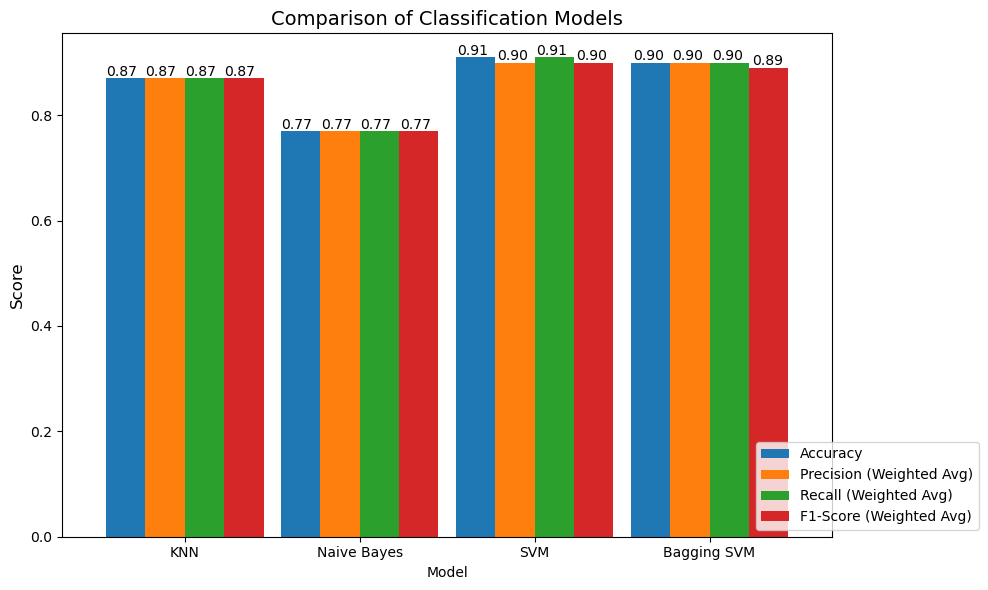

In [54]:
# Plot a bar plot for comparison
performance_comparison.set_index("Model", inplace=True)
ax = performance_comparison.plot(kind="bar", figsize=(10, 6), width=0.9)

# Set plot title and labels
plt.title("Comparison of Classification Models", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=0)
plt.legend(loc="lower right", bbox_to_anchor=(1.2, 0))

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))

# Display the plot
plt.tight_layout()
plt.show()

## Cross-Validation (10 folds) Accuracy Comparison Across Models

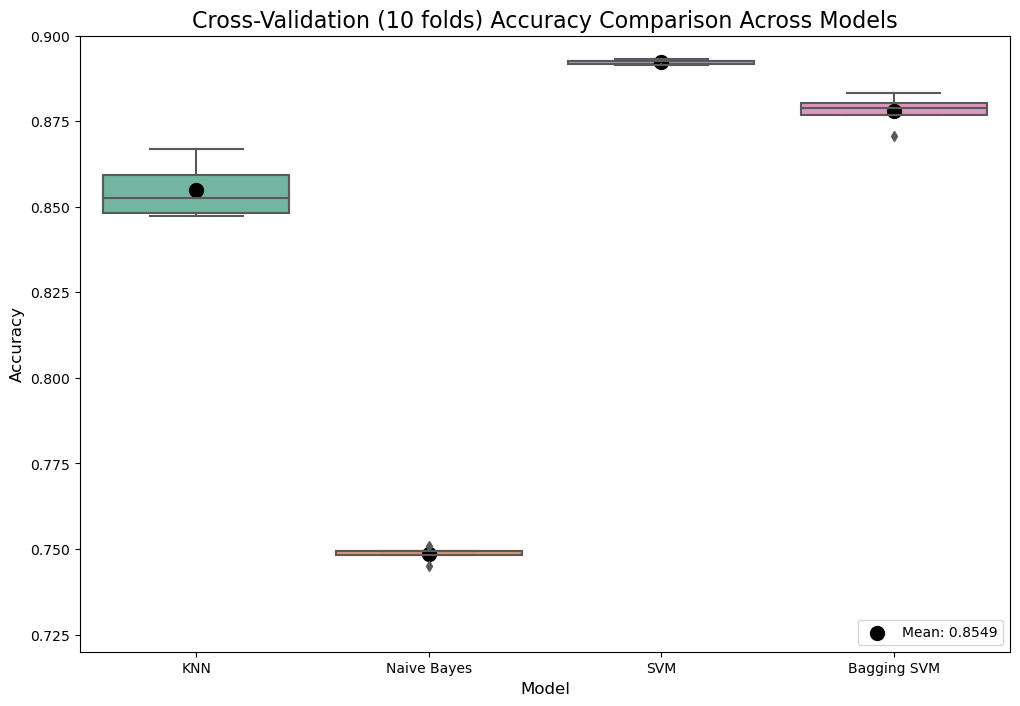

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract fold scores from the best parameter combination for each model

# For KNN
best_index_knn = grid_search_knn.best_index_  # Index of the best hyperparameter combination
fold_scores_knn = [grid_search_knn.cv_results_[f'split{i}_test_score'][best_index_knn] for i in range(10)]  # 10-fold CV

# For Naive Bayes (since there's usually no hyperparameter tuning for Naive Bayes, only one result)
best_index_nb = grid_search_nb.best_index_
fold_scores_nb = [grid_search_nb.cv_results_[f'split{i}_test_score'][best_index_nb] for i in range(10)]  # 10-fold CV

# For SVM
best_index_svm = gridsearch_SVM.best_index_
fold_scores_svm = [gridsearch_SVM.cv_results_[f'split{i}_test_score'][best_index_svm] for i in range(10)]  # 10-fold CV

# For Bagging SVM
best_index_bagging_svm = gridsearch_bagging_svm.best_index_
fold_scores_bagging_svm = [gridsearch_bagging_svm.cv_results_[f'split{i}_test_score'][best_index_bagging_svm] for i in range(10)]  # 10-fold CV


# Combine the fold scores into a DataFrame for comparison
cv_fold_data = pd.DataFrame({
    'KNN': fold_scores_knn,
    'Naive Bayes': fold_scores_nb,
    'SVM': fold_scores_svm,
    'Bagging SVM': fold_scores_bagging_svm
})

# Convert to long format for plotting
cv_fold_data_long = pd.melt(cv_fold_data, var_name="Model", value_name="Accuracy")

# Calculate means for each model
means = cv_fold_data.mean()

# Plot the comparison of CV results across models
plt.figure(figsize=(12, 8)) 
sns.boxplot(x="Model", y="Accuracy", data=cv_fold_data_long, palette="Set2")

# Add mean accuracy markers
for i in range(len(means)):
    plt.scatter(i, means[i], color='black', marker='o', s=100, label=f'Mean: {means[i]:.4f}' if i == 0 else "")

# Add labels and titles
plt.title('Cross-Validation (10 folds) Accuracy Comparison Across Models', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Set limits for better zoom (optional)
plt.ylim(0.72, 0.90)

# Show the legend for the mean markers
plt.legend(loc='lower right')

plt.show()





## Time

In [ ]:
import time

# Calculate training time and inference time for each model
# KNN
start_time = time.time()
grid_search_knn.fit(X_train_pca, y_train)
train_time_knn = time.time() - start_time

start_time = time.time()
y_pred_knn = grid_search_knn.predict(X_test1_pca)
inference_time_knn = time.time() - start_time

# Naive Bayes
start_time = time.time()
grid_search_nb.fit(X_train_pca, y_train)
train_time_nb = time.time() - start_time

start_time = time.time()
y_pred_nb = grid_search_nb.predict(X_test1_pca)
inference_time_nb = time.time() - start_time

# SVM
start_time = time.time()
gridsearch_SVM.fit(X_train_scaled, y_train)
train_time_svm = time.time() - start_time

start_time = time.time()
y_pred_svm = gridsearch_SVM.predict(X_test1_scaled)
inference_time_svm = time.time() - start_time



In [38]:
# Bagging SVM
# Use the best estimator to predict on the test set
start_time = time.time()
y_pred_bagging_svm = gridsearch_bagging_svm.best_estimator_.predict(X_test1_scaled) 
# Measure inference time
inference_time_bagging_svm = time.time() - start_time


# Time comparison
time_table = pd.DataFrame({
    "Model": ["KNN", "Naive Bayes", "SVM", "Bagging SVM"],
    "Training Time (s)": [train_time_knn, train_time_nb, train_time_svm, training_time_bagging_svm],
    "Inference Time (s)": [inference_time_knn, inference_time_nb, inference_time_svm, inference_time_bagging_svm]
})

time_table



,Model,Training Time (s),Inference Time (s)
0,KNN,776.606794,24.025707
1,Naive Bayes,1.834185,0.049849
2,SVM,478.965051,5.275551
3,Bagging SVM,539.743210,37.042398


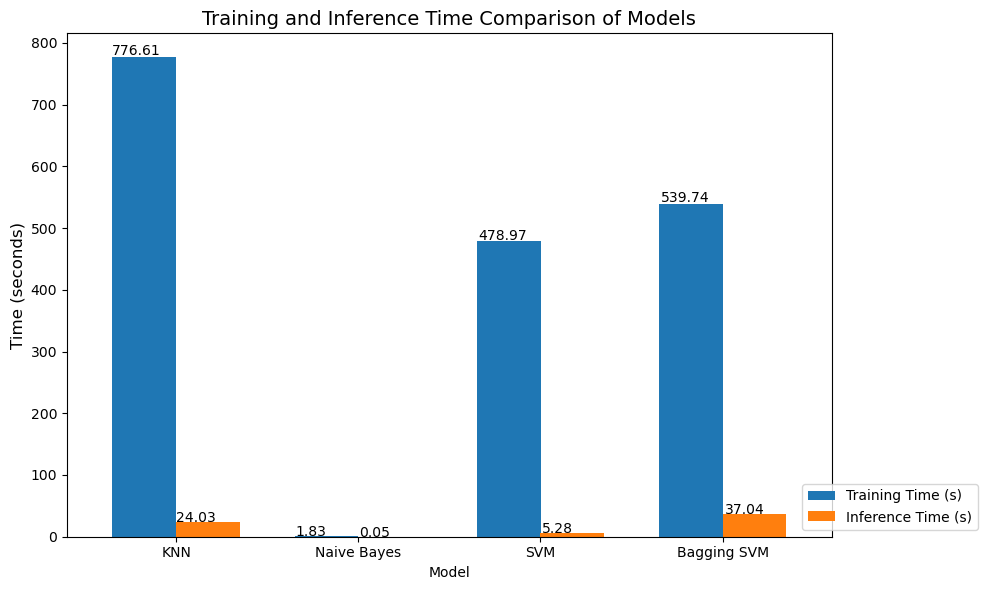

In [55]:
time_table.set_index("Model", inplace=True)
ax_time = time_table.plot(kind="bar", figsize=(10, 6), width=0.7)

# Set plot title and labels
plt.title("Training and Inference Time Comparison of Models", fontsize=14)
plt.ylabel("Time (seconds)", fontsize=12)
plt.xticks(rotation=0)
plt.legend(loc="lower right", bbox_to_anchor=(1.2, 0))

# Add values on top of each bar
for p in ax_time.patches:
    ax_time.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))

# Display the plot
plt.tight_layout()
plt.show()

## Confusion Matrixes

c:\Users\Orzbear\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


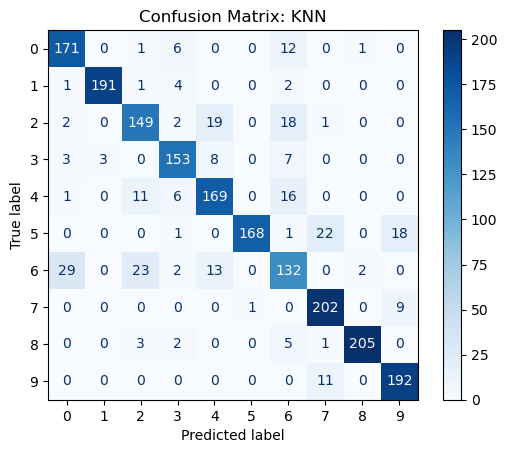

c:\Users\Orzbear\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


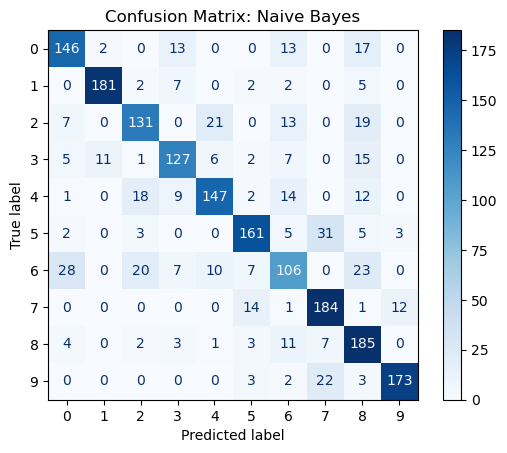

c:\Users\Orzbear\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


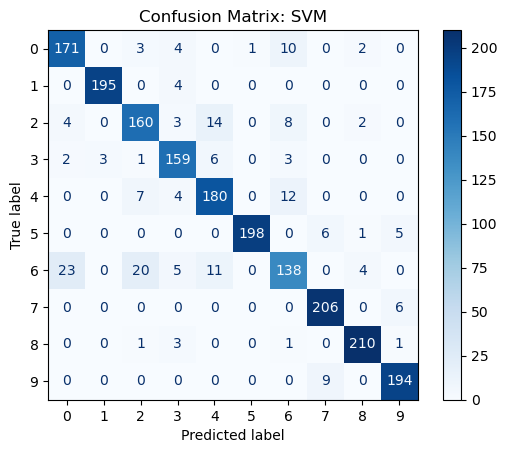

c:\Users\Orzbear\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


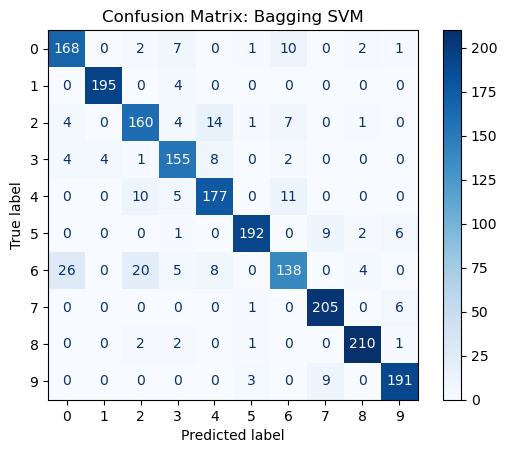

In [40]:
from sklearn.metrics import plot_confusion_matrix

# Plot confusion matrix for KNN
plot_confusion_matrix(grid_search_knn.best_estimator_, X_test1_pca, y_test1, cmap='Blues')
plt.title("Confusion Matrix: KNN")
plt.show()

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(grid_search_nb.best_estimator_, X_test1_pca, y_test1, cmap='Blues')
plt.title("Confusion Matrix: Naive Bayes")
plt.show()

# Plot confusion matrix for SVM
plot_confusion_matrix(gridsearch_SVM.best_estimator_, X_test1_scaled, y_test1, cmap='Blues')
plt.title("Confusion Matrix: SVM")
plt.show()

# Plot confusion matrix for Bagging SVM
plot_confusion_matrix(gridsearch_bagging_svm.best_estimator_, X_test1_scaled, y_test1, cmap='Blues')
plt.title("Confusion Matrix: Bagging SVM")
plt.show()


## Learning curve

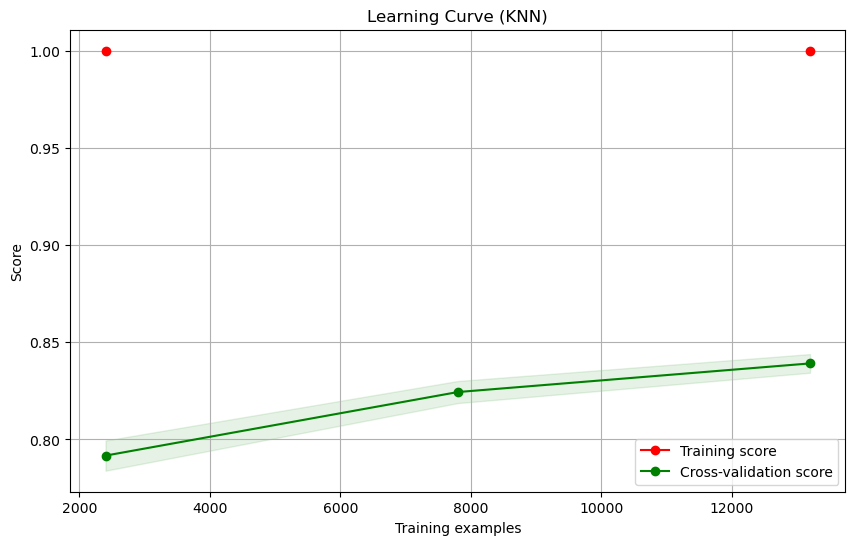

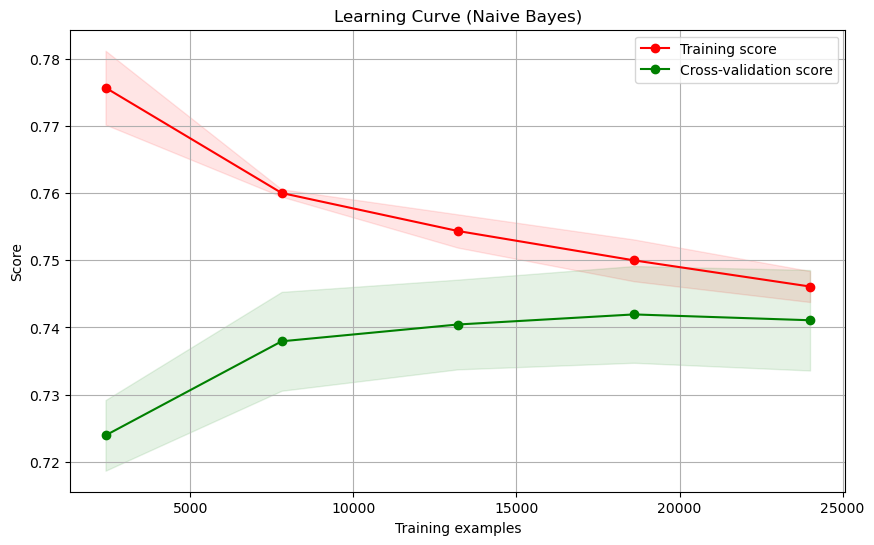

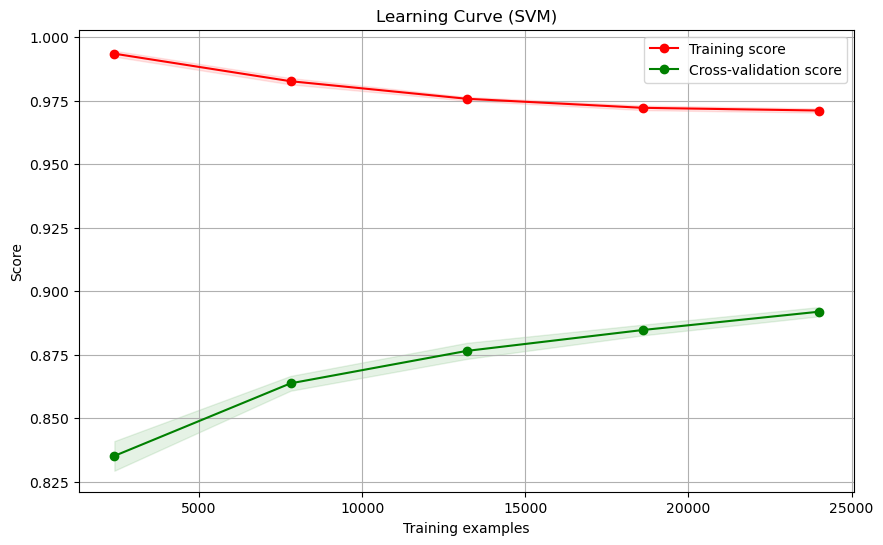

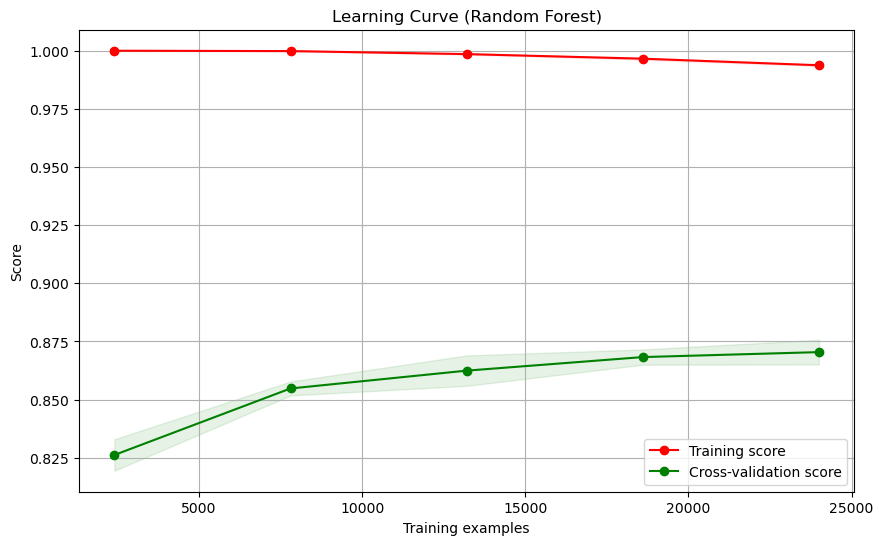

In [18]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    # Calculate learning curves
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Compute mean and standard deviation
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Plot learning curve
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# For KNN
plot_learning_curve(grid_search_knn.best_estimator_, "Learning Curve (KNN)", X_train_pca, y_train, cv=5, n_jobs=-1)
plt.show()

# For Naive Bayes
plot_learning_curve(grid_search_nb.best_estimator_, "Learning Curve (Naive Bayes)", X_train_pca, y_train, cv=5, n_jobs=-1)
plt.show()

# For SVM
plot_learning_curve(gridsearch_SVM.best_estimator_, "Learning Curve (SVM)", X_train_scaled, y_train, cv=5, n_jobs=-1)
plt.show()



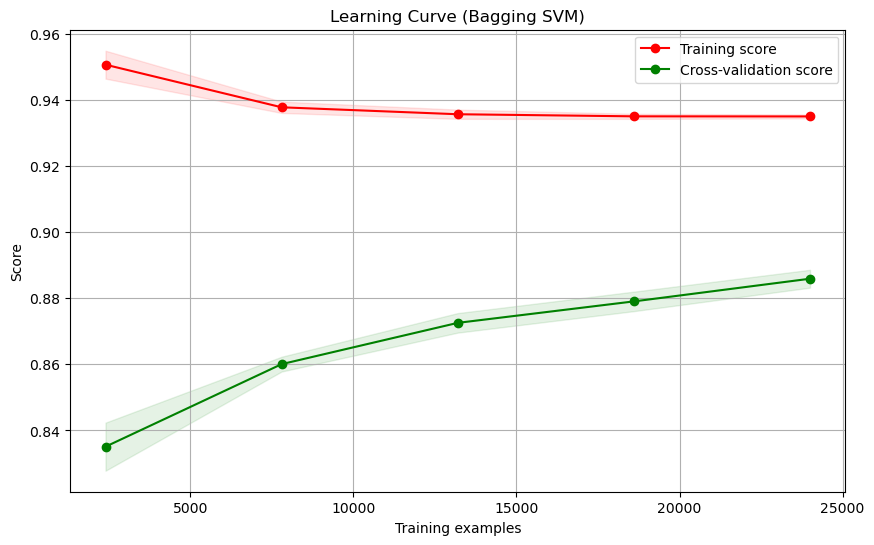

In [24]:
# learning curve plot for Bagging SVM
plot_learning_curve(gridsearch_bagging_svm.best_estimator_, "Learning Curve (Bagging SVM)", X_train_scaled, y_train, cv=5, n_jobs=-1)
plt.show()

# The Best Classifier - SVM

Comparing all the performances, the SVM should be the best classifier among all based on the follwoing reasons:

1. The overall accuracy is the highest
2. Although suffering from some extent of the overfitting, the capability of the model to predit the output for the unknowining data is still higher than the traning score. The CV score is also increasing when there's more samples.
3. The training time and infere time, especially comparing with the Bagging SVM, is significantly faster.

As the result, we proceed with the SVM as the best classifier for our dataset.

In [8]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Set up the pipeline with the known best parameters
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Ensuring the data is scaled
    ('pca', PCA(n_components=150)),  # Use PCA with 150 components
    ('svm', SVC(C=5, gamma='scale', kernel='rbf', random_state=42))  # SVM with the known best parameters
])

# Fit the model on the scaled training data directly
pipeline.fit(X_train_scaled, y_train)



Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=150)),
                ('svm', SVC(C=5, random_state=42))])

# Loading testing data

In [8]:
test2_df = pd.read_csv('data/test2.csv')
print(test2_df.head())



   id  v1  v2  v3  v4  v5  v6  v7  v8  v9  ...  v775  v776  v777  v778  v779  \
0   1   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
1   2   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
2   3   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
3   4   0   0   1   0   2   0   0   0   0  ...   187   155   143    69     0   
4   5   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   

   v780  v781  v782  v783  v784  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     0     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 785 columns]


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and labels for train and test1 sets (with labels)
X_train = train_df.iloc[:, 1:-1].values  # Features from train data
y_train = train_df.iloc[:, -1].values    # Labels from train data

X_test1 = test1_df.iloc[:, 1:-1].values  # Features from test1 data
y_test1 = test1_df.iloc[:, -1].values    # Labels from test1 data

# Only features for test2, since it has no labels
X_test2 = test2_df.iloc[:, 1:].values    # Features from test2 data (without labels)

# Normalize features (use the same scaler for both train and test sets)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test1_scaled = scaler.transform(X_test1)      # Transform test1 using the same scaler
X_test2_scaled = scaler.transform(X_test2)      # Transform test2 using the same scaler (no labels)

# Train the pipeline using the scaled training data
pipeline.fit(X_train_scaled, y_train)

# Predict on test2 data (which has no labels)
y_pred_test2 = pipeline.predict(X_test2_scaled)

# The predicted output for test2 set is stored in y_pred_test2
print("Predicted labels for test2:", y_pred_test2)

# Create a DataFrame with two columns: id and label
output_df = pd.DataFrame({
    'id': range(len(y_pred_test2)),  # Sequential ID starting from 0
    'label': y_pred_test2            # Predicted labels
})

# Save the DataFrame as test_output.csv
output_df.to_csv('data/test_output.csv', index=False)



Predicted labels for test2: [3 7 3 ... 1 7 5]


# For Kaggle

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Combine the features and labels of train and test1
X_combined = np.vstack((X_train, X_test1))  # Stack the features
y_combined = np.hstack((y_train, y_test1))  # Stack the labels

# Normalize the combined features
scaler = MinMaxScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

# Train a new model using the combined and scaled dataset
pipeline.fit(X_combined_scaled, y_combined)

# Predict on test2 data using the newly trained model
X_test2_scaled = scaler.transform(X_test2)  # Use the same scaler for test2
y_pred_test2 = pipeline.predict(X_test2_scaled)

# Save the predicted output to CSV
output_df = pd.DataFrame({
    'id': range(len(y_pred_test2)),  # Sequential ID starting from 0
    'label': y_pred_test2            # Predicted labels for test2
})

output_df.to_csv('data/test_output_kaggle.csv', index=False)


In [16]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Only features for test2, since it has no labels
X_test2 = test2_df.iloc[:, 1:].values    # Features from test2 data (without labels)
X_test2_scaled = scaler.transform(X_test2)  # Use the same scaler for test2

# Combine the features and labels of train and test1
X_combined = np.vstack((X_train, X_test1))  # Stack the features
y_combined = np.hstack((y_train, y_test1))  # Stack the labels

# Normalize the combined features
scaler = MinMaxScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

# Define the base SVM model with the known best parameters
base_svm = SVC(kernel='rbf', C=2, gamma='scale', random_state=42)

# Set up the BaggingClassifier with the base SVM
bagging_svm = BaggingClassifier(
    base_estimator=base_svm,
    n_estimators=10,  # Number of base SVM models in the ensemble
    max_samples=0.8,  # Each SVM is trained on 80% of the training data
    n_jobs=-1,
    random_state=42
)

# Set up a pipeline with scaling, PCA, and the Bagging SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),   
    ('pca', PCA(n_components=150)),  # Known best number of PCA components
    ('bagging_svm', bagging_svm)     # Bagging SVM with best parameters
])

# Assuming X_combined_scaled is already scaled and prepared
# Train the model on X_combined_scaled
pipeline.fit(X_combined_scaled, y_combined)

# Predict on X_test2_scaled
y_pred_test2 = pipeline.predict(X_test2_scaled)

# Save the prediction to a CSV file
output_df = pd.DataFrame({
    'id': range(len(y_pred_test2)),
    'label': y_pred_test2
})
output_df.to_csv('output_bagging_svm_kaggle.csv', index=False)

print("Prediction saved to 'output_bagging_svm_kaggle.csv'")


Prediction saved to 'output_bagging_svm_kaggle.csv'
